In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('data/data.csv')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [6]:
df.columns=df.columns.str.strip()

In [7]:
df=df.drop(columns=['Unnamed: 0','CollegeCityID'])

In [8]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,0.300400,2012.105803,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,0.458489,31.857271,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,0.000000,2012.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,0.000000,2013.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,1.000000,2014.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,1.000000,2017.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [12]:
# 3. Typecasting
df['DOJ'] = pd.to_datetime(df['DOJ'], "%d-%m-%Y")
df['DOB'] = pd.to_datetime(df['DOB'], "%d-%m-%Y")
df['12graduation']=pd.to_datetime(df['12graduation'])
df['GraduationYear']=pd.to_datetime(df['GraduationYear'])

In [13]:
df['Gender'] = df['Gender'].replace({'f': 'Female', 'm': 'Male'})

In [14]:
# Checking if there are any 0 and -1 values in the data
print((df==-1).sum()[(df== -1).sum() > 0 ])

Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
dtype: int64


In [15]:
print((df==0).sum()[(df== 0).sum() > 0 ])

CollegeCityTier    2797
dtype: int64


In [16]:
# Replacing 0 and -1
df['Domain']=df['Domain'].replace(-1, 0)
df['Domain']=df['Domain'].replace(-1, 0)
df['ComputerProgramming']=df['ComputerProgramming'].replace(-1, 0)
df['ElectronicsAndSemicon']=df['ElectronicsAndSemicon'].replace(-1, 0)
df['ComputerScience']=df['ComputerScience'].replace(-1, 0)
df['MechanicalEngg']=df['MechanicalEngg'].replace(-1, 0)
df['ElectricalEngg']=df['ElectricalEngg'].replace(-1, 0)
df['TelecomEngg']=df['TelecomEngg'].replace(-1, 0)
df['CivilEngg']=df['CivilEngg'].replace(-1, 0)

In [17]:
#  4. Splitting numerical and categorical feature
cat_features = df.select_dtypes(include=['object', 'category']).columns
print(cat_features)

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')


In [18]:
num_features = list(df.select_dtypes(include=['number']).columns)
print(num_features)

['ID', 'Salary', '10percentage', '12percentage', 'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


# Data Visiualization
## Univariant Analysis
### For Numerical Data

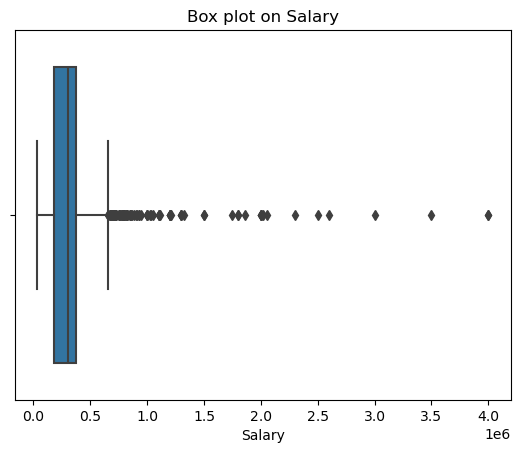

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


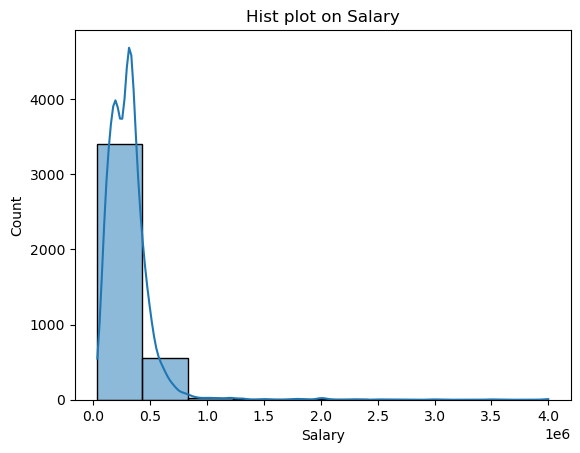

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


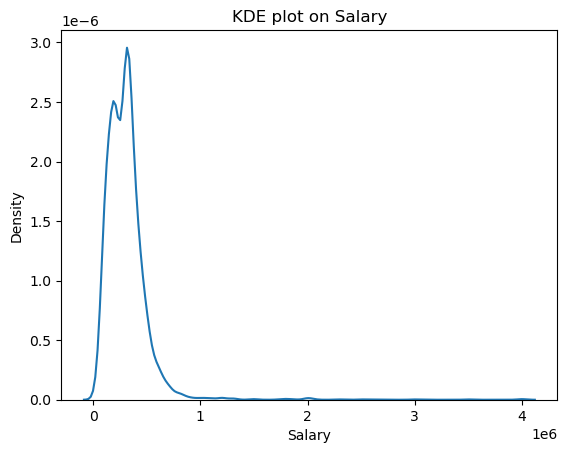

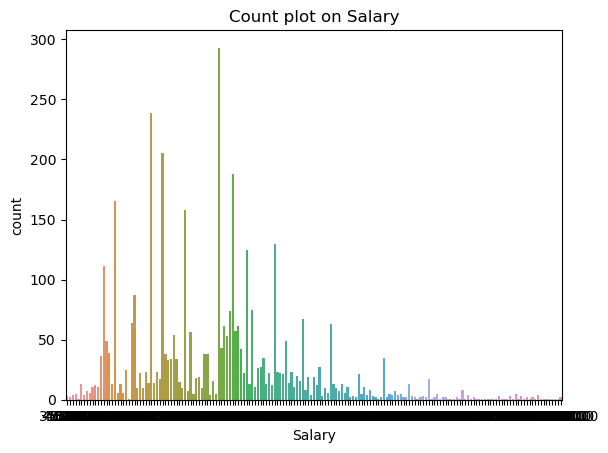

In [19]:
#boxplot
sns.boxplot(data=df, x='Salary')
plt.title('Box plot on Salary')
plt.show()
#histplot
sns.histplot(data=df, x='Salary', kde=True, bins=10)
plt.title('Hist plot on Salary')
plt.show()
#pdfplot
sns.kdeplot(data=df, x='Salary')
plt.title('KDE plot on Salary')
plt.show()
#countplot
sns.countplot(data=df, x='Salary')
plt.title('Count plot on Salary')
plt.show()

> **Observation**
- **Boxplot :** We can clearly see that there are more number of outliers in the Salary Column, to make the data more clear we can remove the data that is > 2.0 
- **Histplot :** The data is right skewed 
- **countplot :** Nearly 300 is the highest value in the Salary

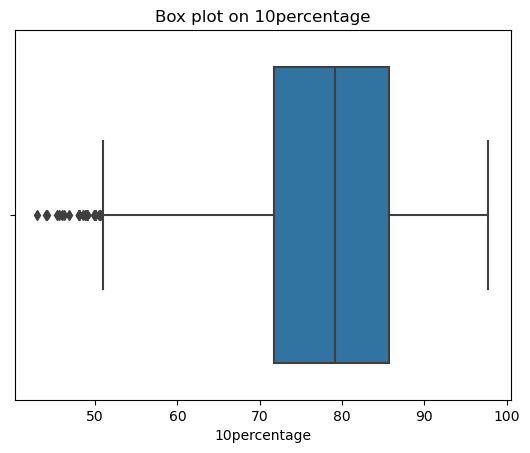

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


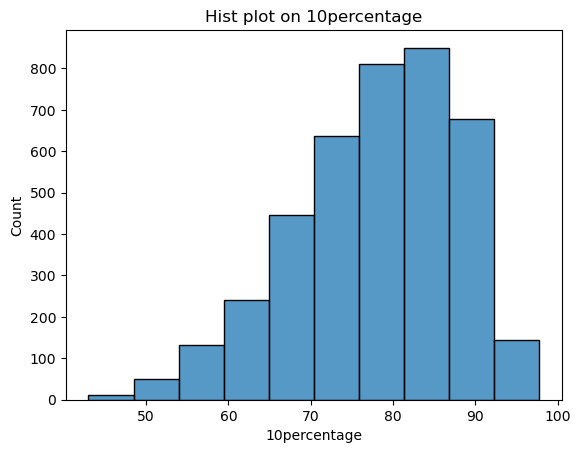

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


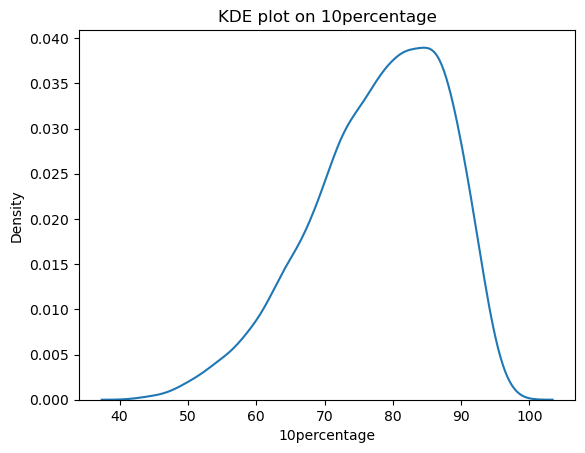

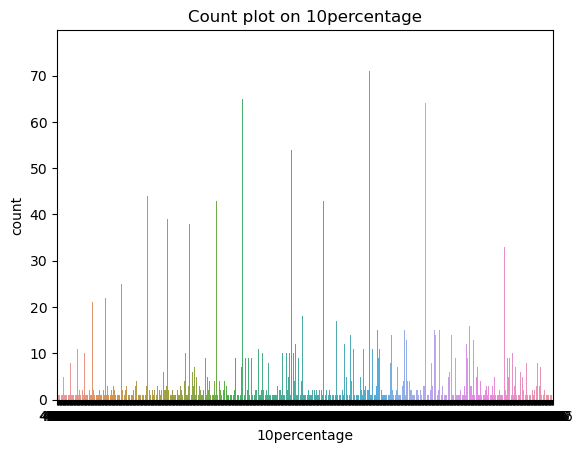

In [20]:
sns.boxplot(data=df, x='10percentage')
plt.title('Box plot on 10percentage')
plt.show()
sns.histplot(data=df, x='10percentage', kde=False, bins=10)
plt.title('Hist plot on 10percentage')
plt.show()
sns.kdeplot(data=df, x='10percentage')
plt.title('KDE plot on 10percentage')
plt.show()
sns.countplot(data=df, x='10percentage')
plt.title('Count plot on 10percentage')
plt.show()

> **Observation**
- **Boxplot :** We can say that average 10percentage is 80 and there are some outliers which are less than 50
- **Histpolt :** The data is left skewed and from plot we can tell that avg lies between 80-90

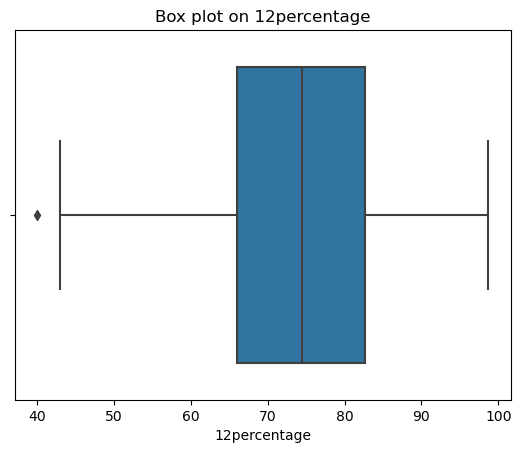

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


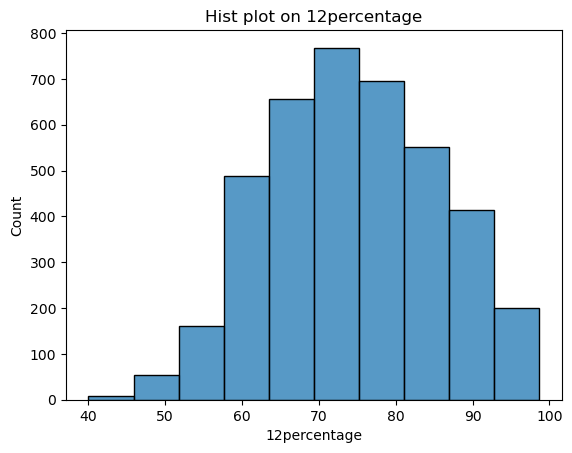

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


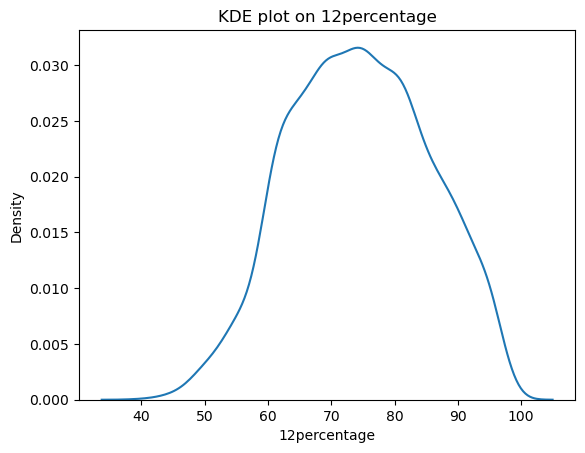

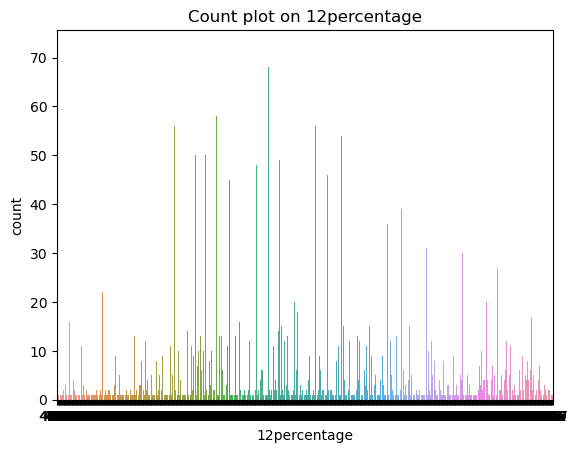

In [21]:
sns.boxplot(data=df, x='12percentage')
plt.title('Box plot on 12percentage')
plt.show()
sns.histplot(data=df, x='12percentage', kde=False, bins=10)
plt.title('Hist plot on 12percentage')
plt.show()
sns.kdeplot(data=df, x='12percentage')
plt.title('KDE plot on 12percentage')
plt.show()
sns.countplot(data=df, x='12percentage')
plt.title('Count plot on 12percentage')
plt.show()

> **Observation**
- **Boxplot :** The maximum percentage lies between 70 and 80 and there is only one outlier which can be removed
- **Histplot :** The graph is left skewed and we can observe high values between 60 to 85
- **Countplot :** We can observe that more counts lies between 50-70

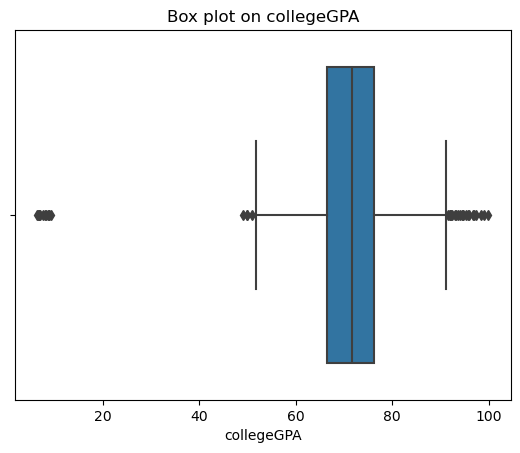

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


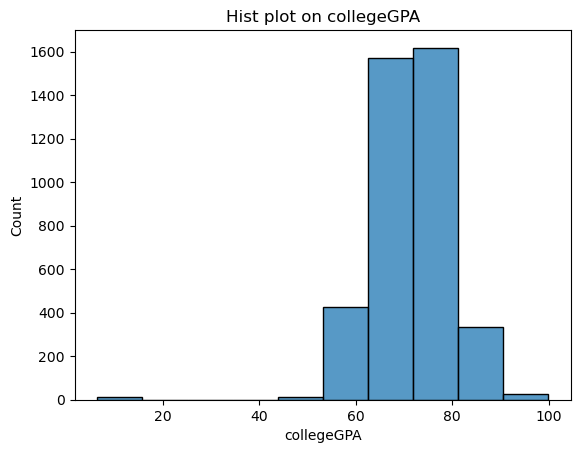

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


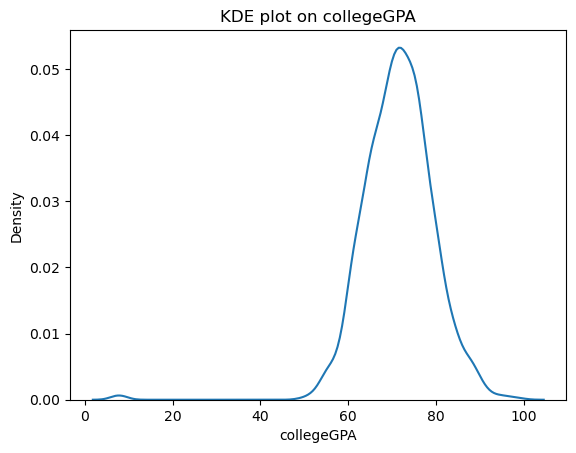

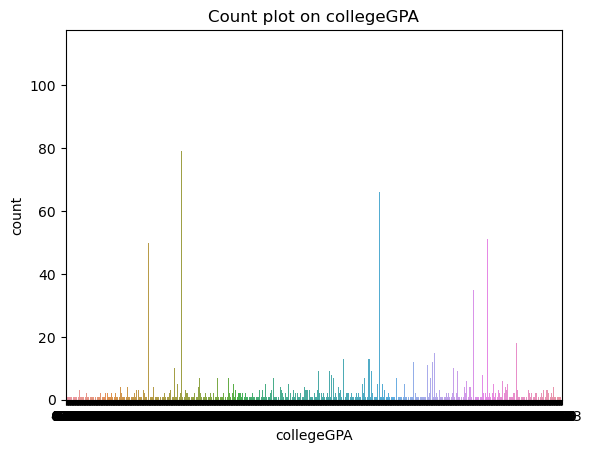

In [22]:
sns.boxplot(data=df, x='collegeGPA')
plt.title('Box plot on collegeGPA')
plt.show()
sns.histplot(data=df, x='collegeGPA', kde=False, bins=10)
plt.title('Hist plot on collegeGPA')
plt.show()
sns.kdeplot(data=df, x='collegeGPA')
plt.title('KDE plot on collegeGPA')
plt.show()
sns.countplot(data=df, x='collegeGPA')
plt.title('Count plot on collegeGPA')
plt.show()

> **Observation**
- **Boxplot :** The avgerage value is at 70. we can say that max CGPA lies in between 60-80. There are only some outliers which is less than 20
- **Histplot :** The data is left skewed and highest count is at 2000 for CGPA in between 70 - 80

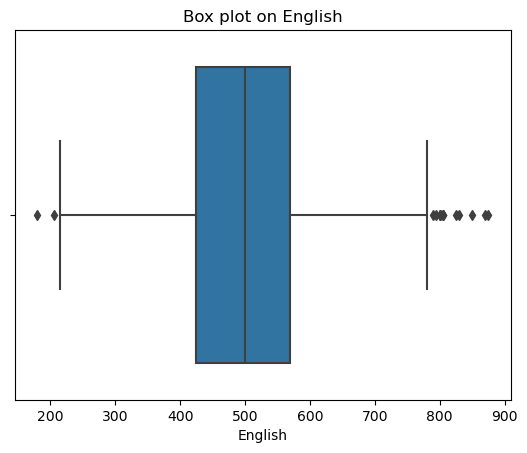

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


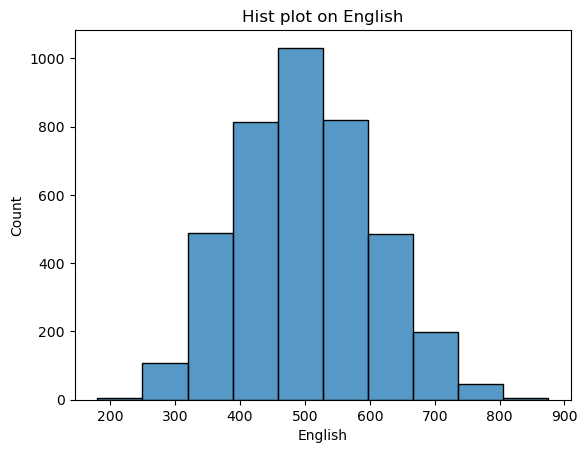

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


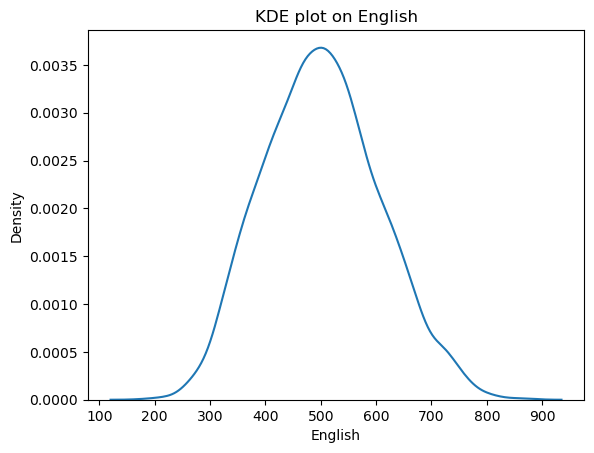

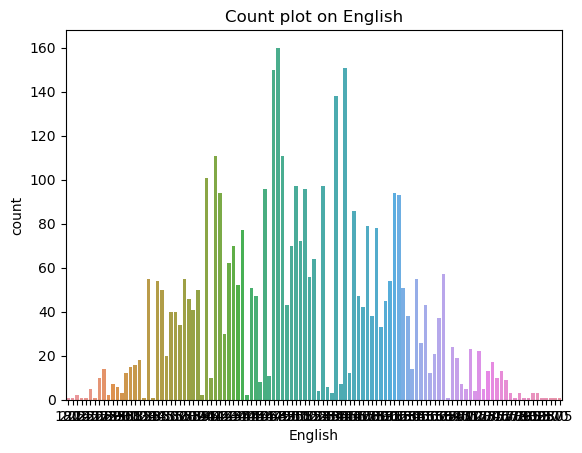

In [23]:
sns.boxplot(data=df, x='English')
plt.title('Box plot on English')
plt.show()
sns.histplot(data=df, x='English', kde=False, bins=10)
plt.title('Hist plot on English')
plt.show()
sns.kdeplot(data=df, x='English')
plt.title('KDE plot on English')
plt.show()
sns.countplot(data=df, x='English')
plt.title('Count plot on English')
plt.show()

> **Observation**
- **Boxplot :** The avgerage value is at 500 and having more outliers which are greater than 800
- **Histplot :** This looks like a Normal Distribution

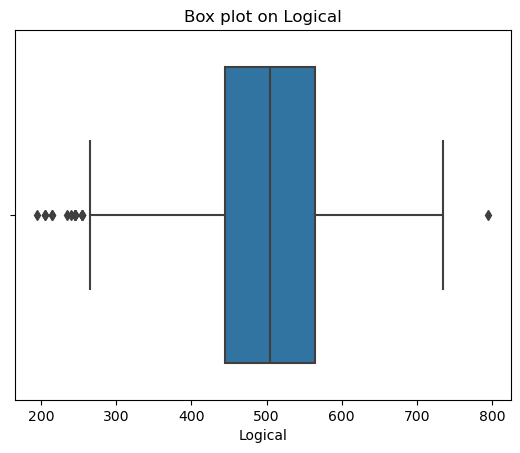

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


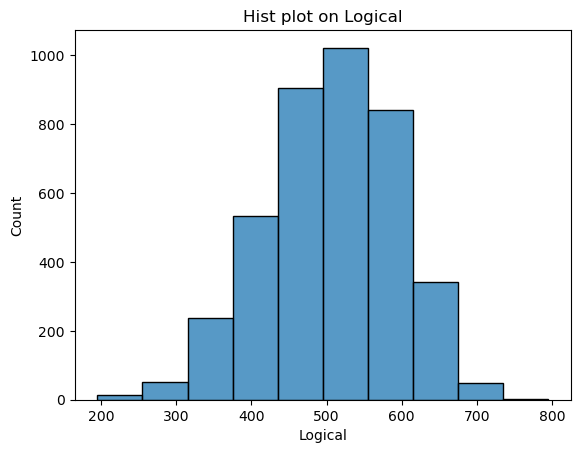

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


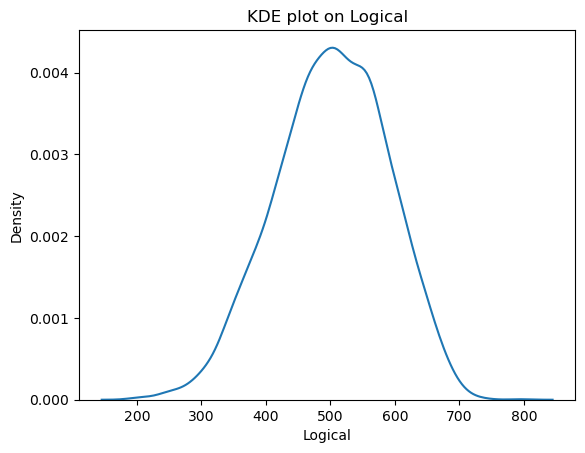

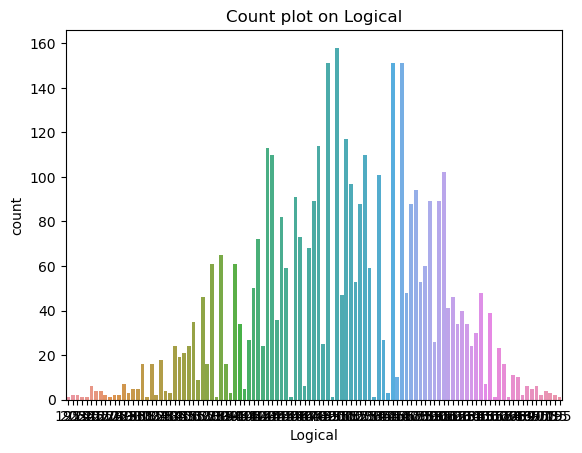

In [24]:
sns.boxplot(data=df, x='Logical')
plt.title('Box plot on Logical')
plt.show()
sns.histplot(data=df, x='Logical', kde=False, bins=10)
plt.title('Hist plot on Logical')
plt.show()
sns.kdeplot(data=df, x='Logical')
plt.title('KDE plot on Logical')
plt.show()
sns.countplot(data=df, x='Logical')
plt.title('Count plot on Logical')
plt.show()

> **Observation**
- **Boxplot :** The avg value is at 500 and there are more outliers which are greater than 800
- **Histplot :** This looks like a Normal Distribution

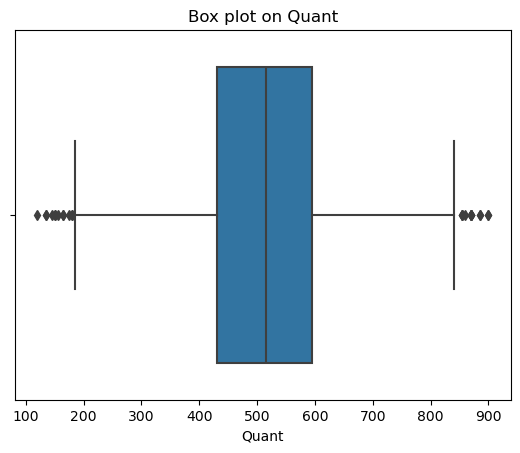

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


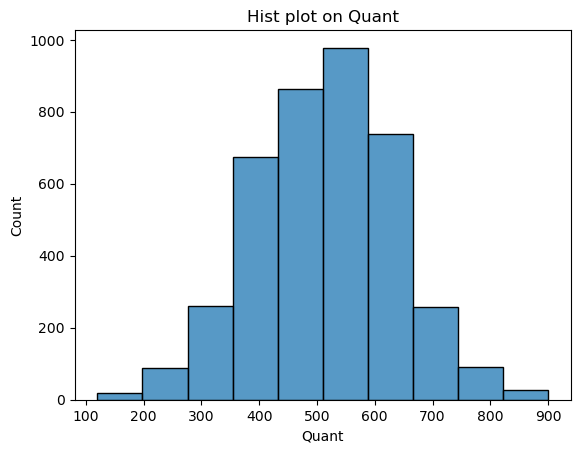

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


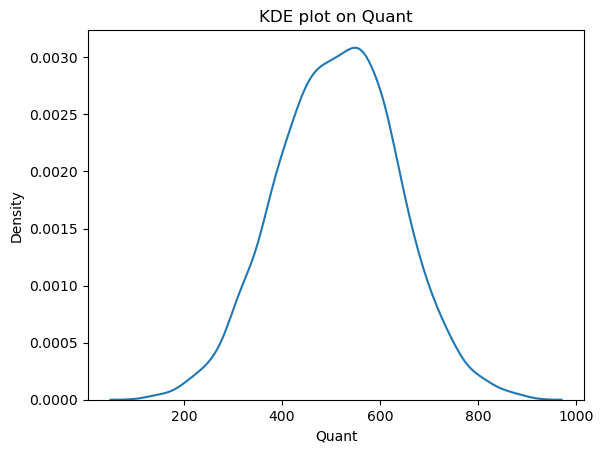

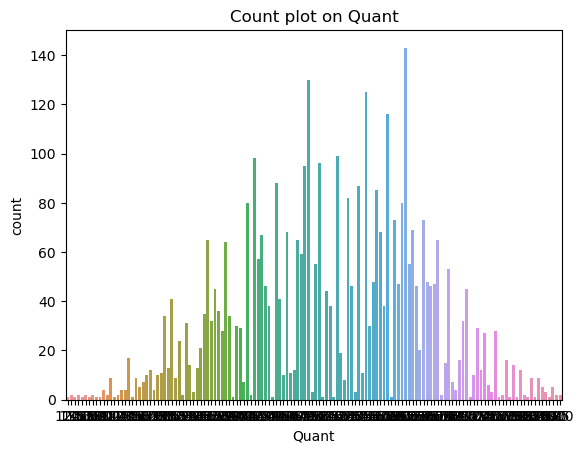

In [25]:
sns.boxplot(data=df, x='Quant')
plt.title('Box plot on Quant')
plt.show()
sns.histplot(data=df, x='Quant', kde=False, bins=10)
plt.title('Hist plot on Quant')
plt.show()
sns.kdeplot(data=df, x='Quant')
plt.title('KDE plot on Quant')
plt.show()
sns.countplot(data=df, x='Quant')
plt.title('Count plot on Quant')
plt.show()

### Categorical Data

In [26]:
df['Designation'] = df['Designation'].replace({'software engg':'software engineer','software developer':'software engineer','system engineer':'systems engineer'})

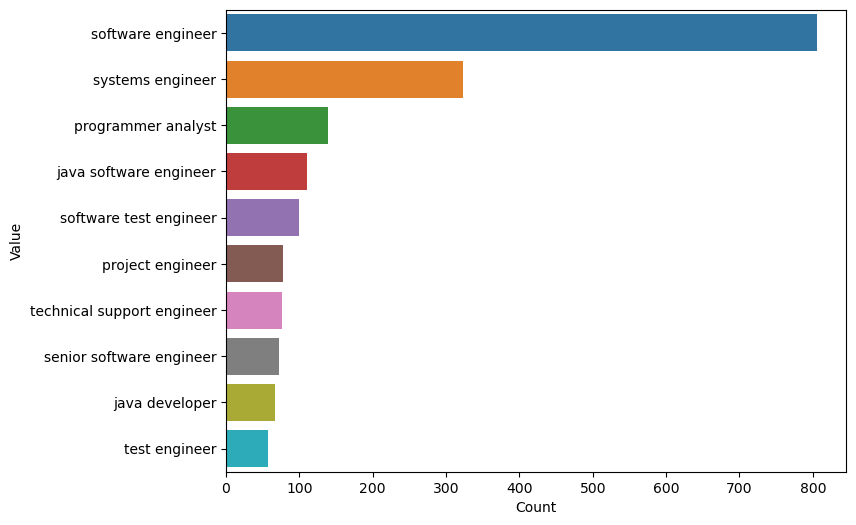

In [27]:
value_counts = df['Designation'].value_counts()
top_no_values = 10
top_values = value_counts.nlargest(top_no_values)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Value')
plt.show()

> **Observation**
> 
---- From the above bar plot we can observe that most of the members are Software Engineer's

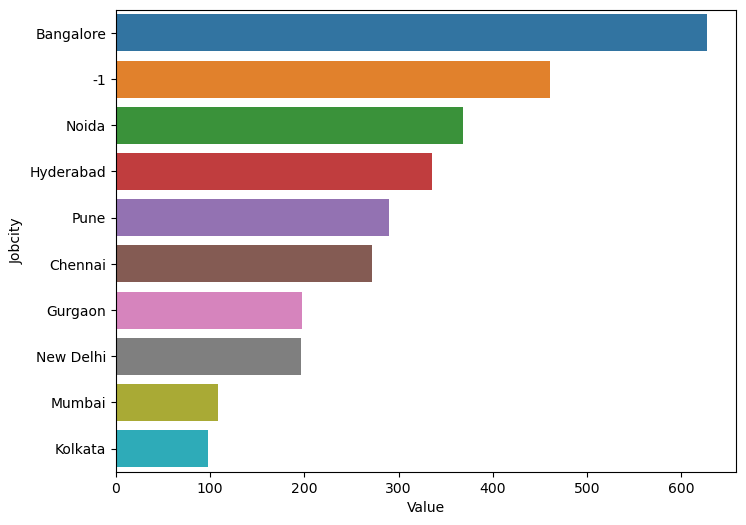

In [28]:
value_counts = df['JobCity'].value_counts()
top_no_values = 10
top_values = value_counts.nlargest(top_no_values)

# To plot the horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.xlabel('Value')
plt.ylabel('Jobcity')
plt.show()

>**Observation**
>
---- From the above bar plot we can tell that most of the members are working 
in Banglore , Noida ,Hyderabad.

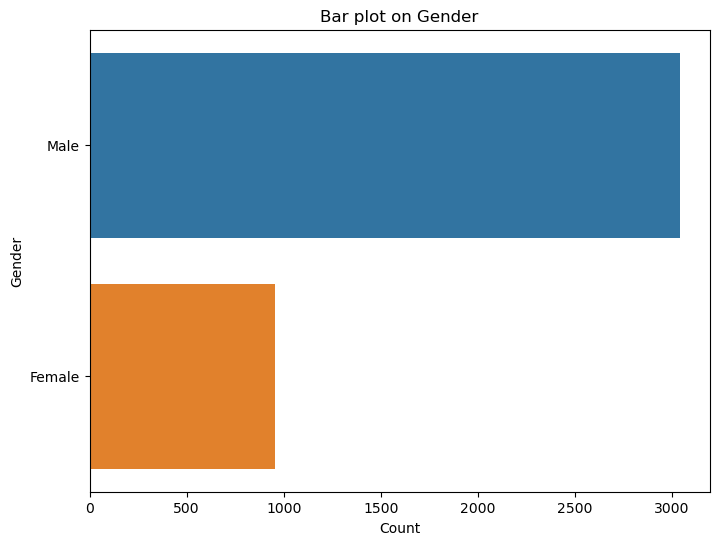

In [29]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.values, y=gender_counts.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Bar plot on Gender')
plt.show()

>**Observation**
>
---- Male genders are more in number when compared to Femalee

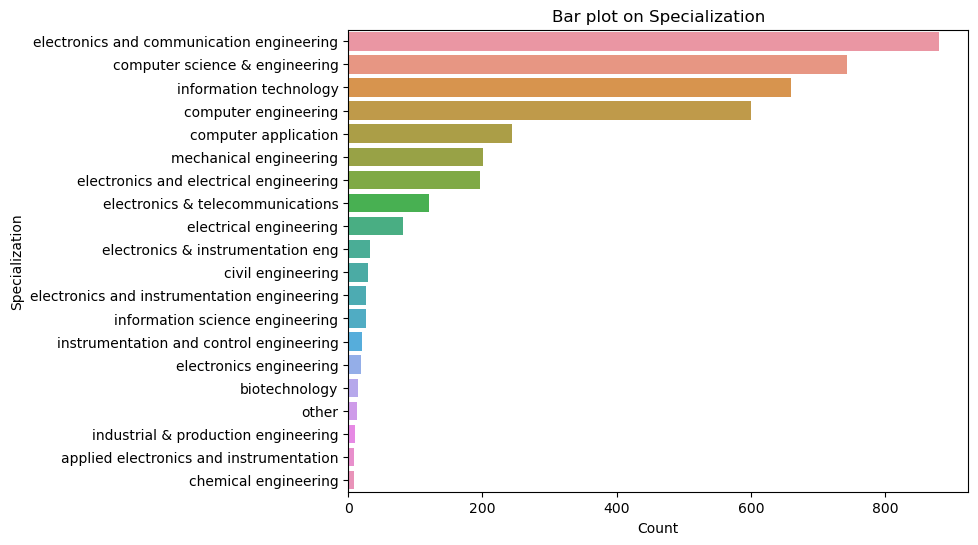

In [30]:
value_counts = df['Specialization'].value_counts()
top_no_values = 20 
top_values = value_counts.nlargest(top_no_values)

# To plot the horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.title('Bar plot on Specialization')
plt.xlabel('Count')
plt.ylabel('Specialization')
plt.show()

>**Observation**
>
---- From the above plot we can tell that most of them are from elctronics and 
communication engineering (ece) , computer sciences

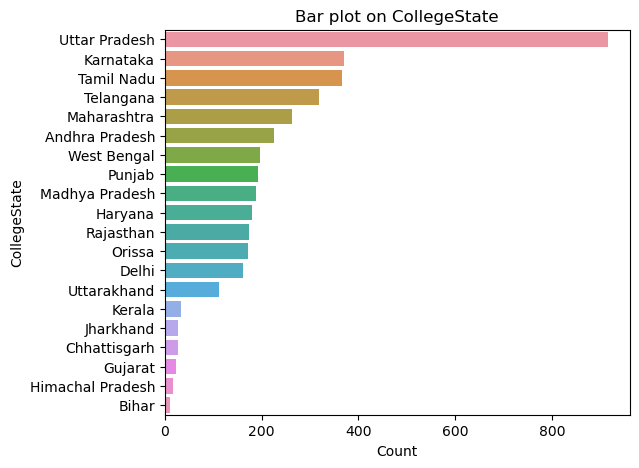

In [31]:
 value_counts = df['CollegeState'].value_counts()
top_no_values = 20
top_values = value_counts.nlargest(top_no_values)

# To plot the horizontal bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.title('Bar plot on CollegeState')
plt.xlabel('Count')
plt.ylabel('CollegeState')
plt.show()

>**Observation**
>
---- From the above plot we can say that there are most graduates from Uttar Pradesh (>800)

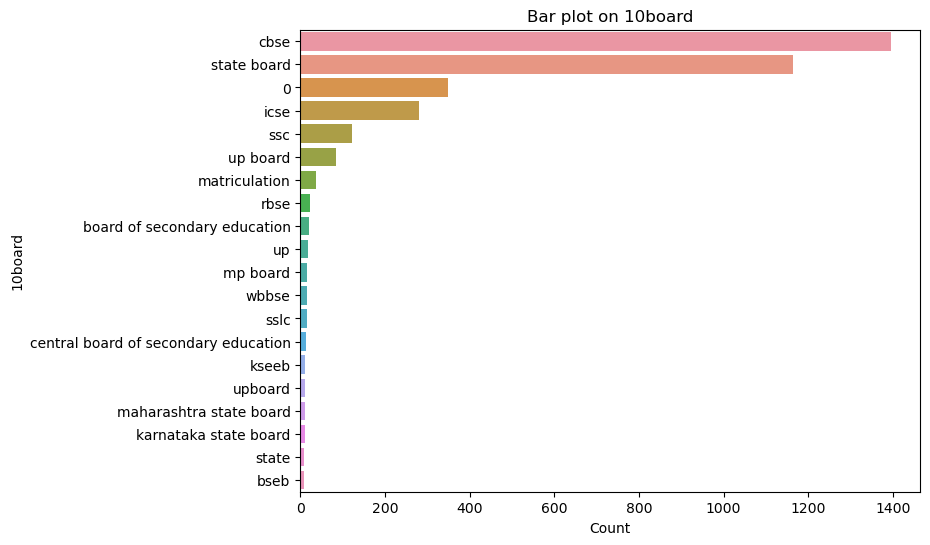

In [32]:
value_counts = df['10board'].value_counts()
top_no_values = 20
top_values = value_counts.nlargest(top_no_values)

# To plot the horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.title('Bar plot on 10board')
plt.xlabel('Count')
plt.ylabel('10board')
plt.show()

>**Observation**
>
---- From the above plot we can say that most of them have completed there 10th board under cbse and state board.

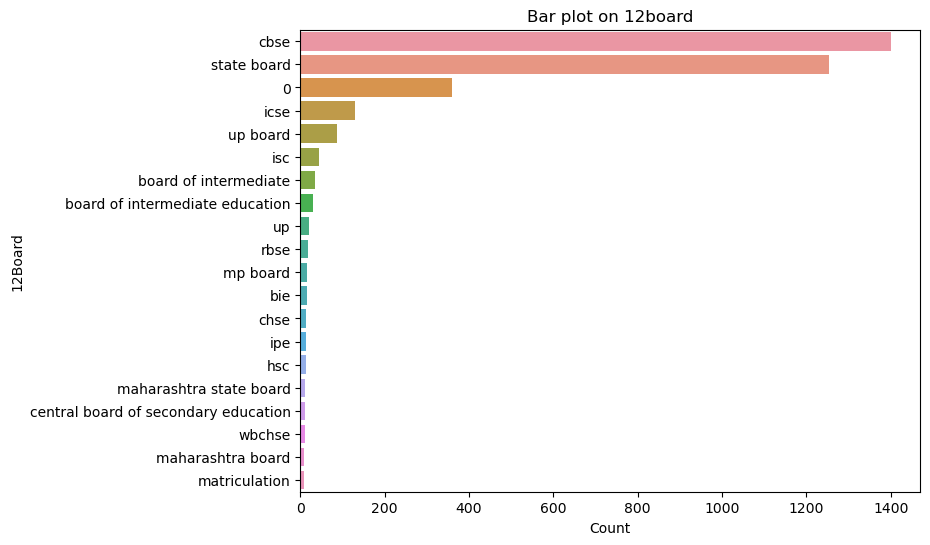

In [33]:
value_counts = df['12board'].value_counts()
top_no_values = 20
top_values = value_counts.nlargest(top_no_values)

# To plot the horizontal bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_values.values, y=top_values.index, orient='h')
plt.title('Bar plot on 12board')
plt.xlabel('Count')
plt.ylabel('12Board')
plt.show()

>**Observation**
>
---- From the above plot we can say that most of them have completed there 10th board under cbse and state board

## Bivariant Analysis
### Numerical vs Numerical Variables

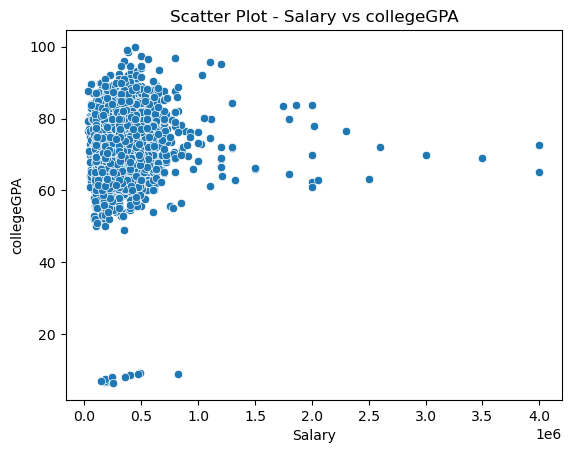

In [34]:
sns.scatterplot(data=df, x='Salary', y='collegeGPA')
plt.xlabel('Salary')
plt.ylabel('collegeGPA')
plt.title('Scatter Plot - Salary vs collegeGPA')
plt.show()

>**Observation**
>
---- From the above scatter plot we can observe that college gpa of large number lies between 60 and 80 and most of the salary lies between 0 and 1

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


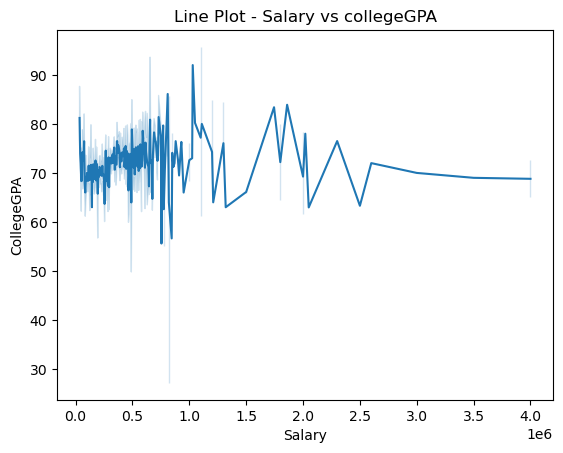

In [35]:
sns.lineplot(data=df, x='Salary', y='collegeGPA')
plt.xlabel('Salary')
plt.ylabel('CollegeGPA')
plt.title('Line Plot - Salary vs collegeGPA')
plt.show()

>**Observation**
>
---- From the line plot we can observe that max gpa is 70 and highest salary is at 4.0

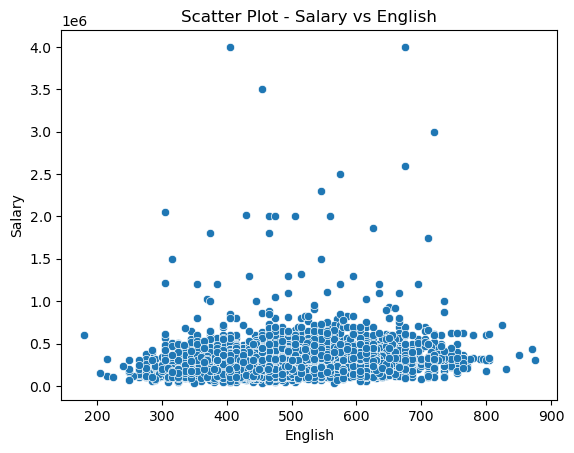

In [36]:
sns.scatterplot(data=df, y='Salary', x='English')
plt.xlabel('English')
plt.ylabel('Salary')
plt.title('Scatter Plot - Salary vs English')
plt.show()

>**Observation**
>
---- From the above plot we can observe that most salary range is in between 0 and 1 range

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


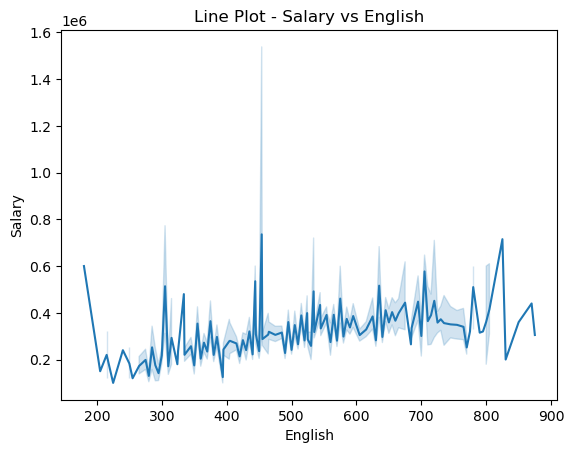

In [37]:
sns.lineplot(data=df, y='Salary', x='English')
plt.xlabel('English')
plt.ylabel('Salary')
plt.title('Line Plot - Salary vs English')
plt.show()

>**Observation**
>
---- From the above Lineplot we can say that the people with least 
knowledge in english has salary in range of 0.2 to 0.6

C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\krant\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


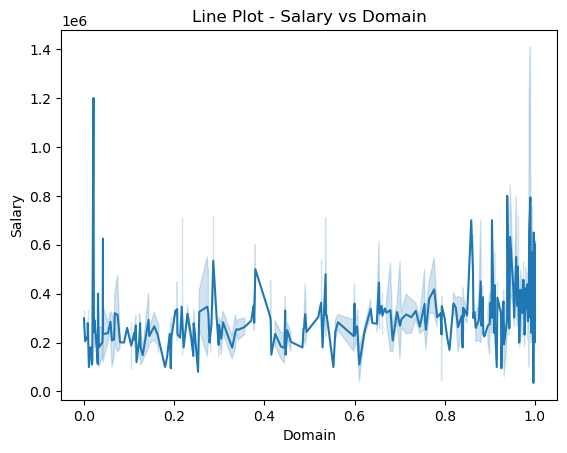

In [38]:
sns.lineplot(data=df, y='Salary', x='Domain')
plt.xlabel('Domain')
plt.ylabel('Salary')
plt.title('Line Plot - Salary vs Domain')
plt.show()

>**Observation**
>
---- In domain we can observe more values in negitive. According to AMCAT -1 represents the absent status.

###  Categorical vs Numerical Variables

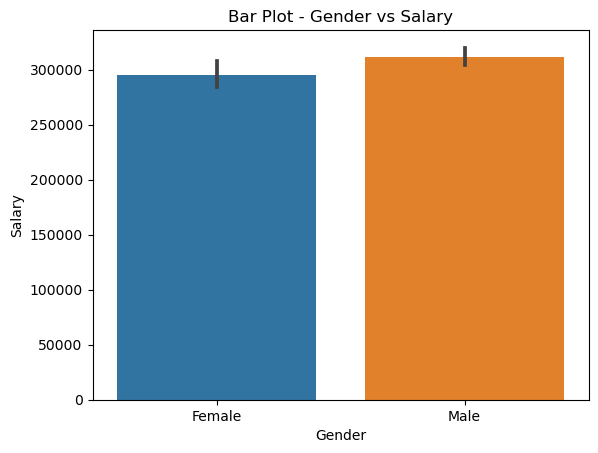

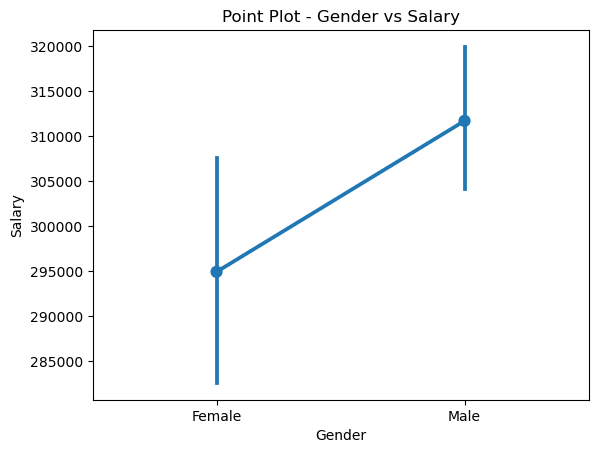

In [39]:
sns.barplot(data=df, x='Gender', y='Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Bar Plot - Gender vs Salary')
plt.show()

sns.pointplot(data=df, x='Gender', y='Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Point Plot - Gender vs Salary')
plt.show()

>**Observation**
- **Barplot :** We can observe that compare to Female Male has the higher salary
- **Pointplot :** We can bserve that the max salary of Female is around 295000 and Male is 310000000

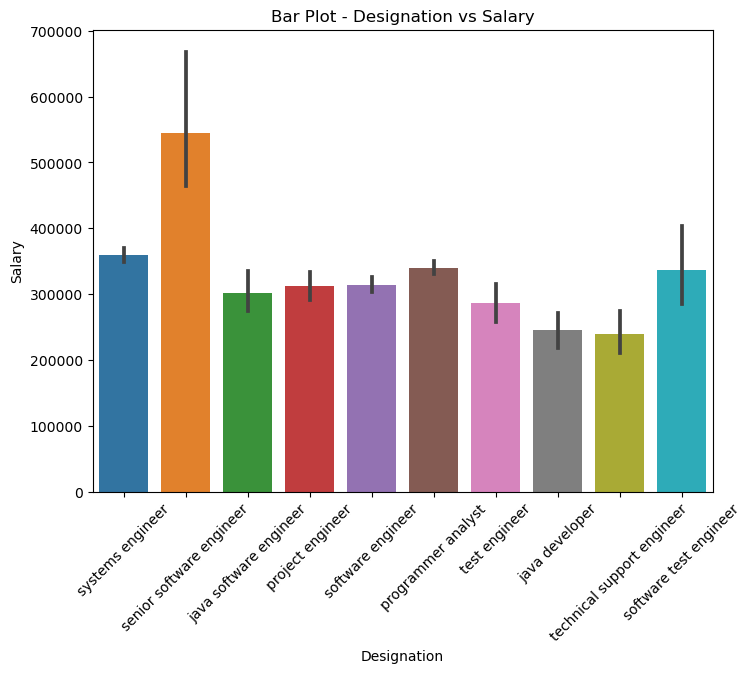

In [40]:
top_designations = df['Designation'].value_counts().nlargest(10).index.tolist()
df_top = df[df['Designation'].isin(top_designations)]

# Tp plot the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_top, x='Designation', y='Salary')
plt.title('Bar Plot - Designation vs Salary')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

>**Observation**
>
---- Senior software engineer has the highest salary followed by 
system engineer

### Categorical vs Categorical Variables

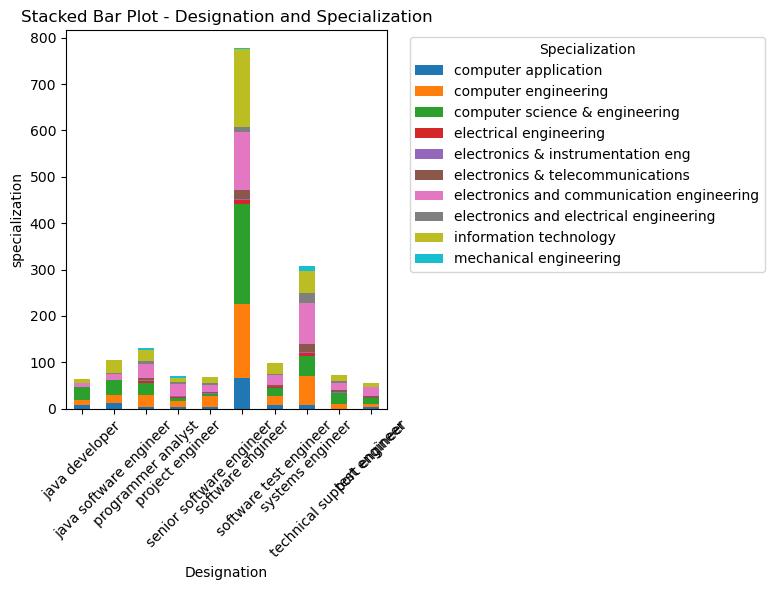

In [41]:
top_designations = df['Designation'].value_counts().nlargest(10).index
top_specializations = df['Specialization'].value_counts().nlargest(10).index
filtered_df = df[(df['Designation'].isin(top_designations)) & (df['Specialization'].isin(top_specializations))]
count_df = filtered_df.groupby(['Designation', 'Specialization']).size().unstack(fill_value=0)

# To plot the stacked bar plot
count_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Designation')
plt.ylabel('specialization')
plt.title('Stacked Bar Plot - Designation and Specialization')
plt.xticks(rotation=45)
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

>**Observation**
>
---- From the above plot we can understand that most software developers are from computer science , electronics and information technology

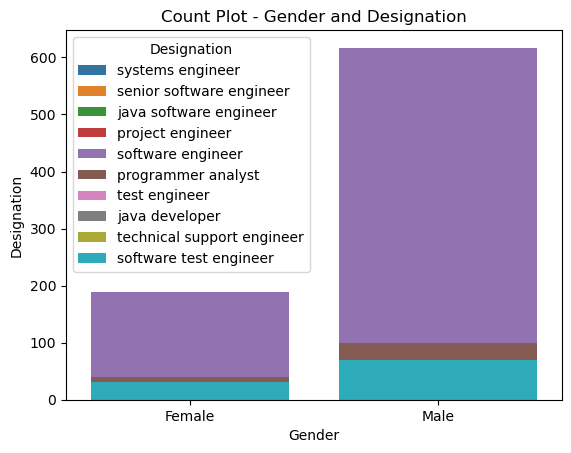

In [42]:
top_designations = df['Designation'].value_counts().nlargest(10).index.tolist()
df_top = df[df['Designation'].isin(top_designations)]
sns.countplot(data=df_top, x='Gender', hue='Designation', dodge=False)
plt.title('Count Plot - Gender and Designation')
plt.xlabel('Gender')
plt.ylabel('Designation')
plt.show()

>**Observation**
>
---- From the above plot we can tell that compared to 
Female large number of Male have the software engineer designation.

#  Research Question

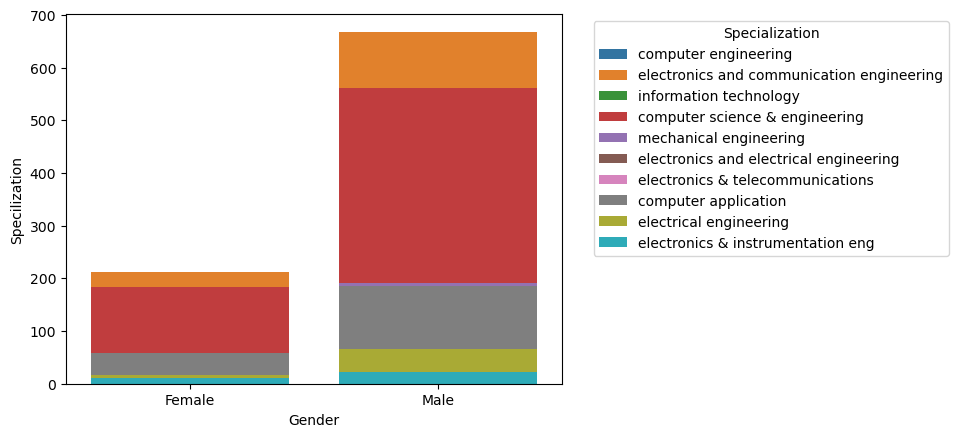

In [43]:
top_specializations = df['Specialization'].value_counts().nlargest(10).index
df_top1 = df[df['Specialization'].isin(top_specializations)]
sns.countplot(data=df_top1, x='Gender', hue='Specialization', dodge=False)
plt.xlabel('Gender')
plt.ylabel('Specilization')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

> **Observation**
>
**** We can clearly see that male has choosen computer science when compared 
to female

## Conclusion
Based on the Analysis mad on the AMEOedata set  ane found the relationship between the Salar 
and other variables. Here are some insigh1.  Computer Science specializationhas thee highest media 
salar
2. Software Engineer are the most aimed 
professios
3.  Males have higest paied when compared to female
4.  Dominance: Software Engineer Domain has the largest number h
5. nal Alignment: Graduates in Computer Science & Engineering show a strong ali nment between
their degree and specialn specializations.ology